# Principal Component Analysis

In [250]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generating problem

3-dimensional data with mean close to 0 of each feature

In [251]:
# Specyfying data mean values
mu_vec1 = np.array([0,0,0]) 

# Specyfying data covariance
cov_mat1 = np.array([[1,0,0], [0,1,0], [0,0,1]]) 

# Randomizing 20 points with mean close to 0.0
sample_set1 = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

In [252]:
print("Sample set no.1 - matrix " + str(sample_set1.shape) + ":\n" + str(sample_set1) + "\n")
print("Mean: " + str(np.mean(sample_set1)))

Sample set no.1 - matrix (20, 3):
[[ 0.44122749 -0.33087015  2.43077119]
 [-0.25209213  0.10960984  1.58248112]
 [-0.9092324  -0.59163666  0.18760323]
 [-0.32986996 -1.19276461 -0.20487651]
 [-0.35882895  0.6034716  -1.66478853]
 [-0.70017904  1.15139101  1.85733101]
 [-1.51117956  0.64484751 -0.98060789]
 [-0.85685315 -0.87187918 -0.42250793]
 [ 0.99643983  0.71242127  0.05914424]
 [-0.36331088  0.00328884 -0.10593044]
 [ 0.79305332 -0.63157163 -0.00619491]
 [-0.10106761 -0.05230815  0.24921766]
 [ 0.19766009  1.33484857 -0.08687561]
 [ 1.56153229 -0.30585302 -0.47773142]
 [ 0.10073819  0.35543847  0.26961241]
 [ 1.29196338  1.13934298  0.4944404 ]
 [-0.33633626 -0.10061435  1.41339802]
 [ 0.22125412 -1.31077313 -0.68956523]
 [-0.57751323  1.15220477 -0.10716398]
 [ 2.26010677  0.65661947  0.12480683]]

Mean: 0.132754823554


3-dimensional data with mean close to 1.0 of each feature

In [253]:
# Specyfying data mean values
mu_vec2 = np.array([1,1,1]) 

# Specyfying data covariance
cov_mat2 = np.array([[1,0,0], [0,1,0], [0,0,1]])

# Randomizing 20 points with mean close to 1.0
sample_set2 = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

In [254]:
print("Sample set no.2 - matrix " + str(sample_set2.shape) + ":\n" + str(sample_set2))
print("Mean: " + str(np.mean(sample_set2)))

Sample set no.2 - matrix (20, 3):
[[ 0.56429608  1.97217931  0.75928886]
 [ 0.17587655  1.56813272  1.01275832]
 [ 2.18906073  0.92640668 -1.85968797]
 [ 1.7893664  -0.87774088  2.53875615]
 [ 2.82136474  0.57296861 -0.16470191]
 [-0.39707402  1.87265462  0.79788182]
 [ 0.40164007  0.7565803   3.08851469]
 [ 1.34691933  1.74572695  1.77690759]
 [ 2.01842113  2.06135144  0.28953355]
 [ 0.7848122   0.23923969  0.28883677]
 [ 2.14150774  0.49824445  0.92084864]
 [ 0.30717366  0.40659723  1.78823794]
 [ 0.55457001  0.51787981  1.49355766]
 [ 1.50048733  1.79242262  1.17076445]
 [-0.75374086  1.63029648  1.49832921]
 [ 2.01813761  0.15353138  3.52080763]
 [-0.23238611  1.72695326  1.04595522]
 [ 0.51286735  1.81613236  0.71856988]
 [-1.33562182 -0.16727845  1.45765807]
 [ 3.23796561 -0.4812592   0.98305468]]
Mean: 1.02504223931


Presenting 3-d data

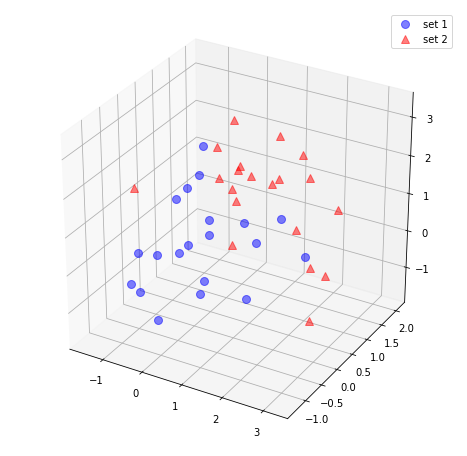

In [255]:
# Create Figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10

# Draw points of both data sets
ax.plot(sample_set1[:,0], sample_set1[:,1], sample_set1[:,2],
        'o', markersize=8, color='blue', alpha=0.5, label="set 1")

ax.plot(sample_set2[:,0], sample_set2[:,1], sample_set2[:,2], 
        '^', markersize=8, color='red', alpha=0.5, label="set 2")

# Show legend
ax.legend(loc='upper right')
plt.show()

Merging two data sets into one

In [256]:
# Merging two sample sets into one
data = np.concatenate((sample_set1, sample_set2), axis=0)

In [257]:
print("All_samples - matrix " + str(data.shape) + ":\n" + str(data))

All_samples - matrix (40, 3):
[[  4.41227487e-01  -3.30870152e-01   2.43077119e+00]
 [ -2.52092130e-01   1.09609842e-01   1.58248112e+00]
 [ -9.09232405e-01  -5.91636658e-01   1.87603226e-01]
 [ -3.29869958e-01  -1.19276461e+00  -2.04876511e-01]
 [ -3.58828947e-01   6.03471603e-01  -1.66478853e+00]
 [ -7.00179038e-01   1.15139101e+00   1.85733101e+00]
 [ -1.51117956e+00   6.44847511e-01  -9.80607885e-01]
 [ -8.56853155e-01  -8.71879183e-01  -4.22507929e-01]
 [  9.96439827e-01   7.12421271e-01   5.91442432e-02]
 [ -3.63310878e-01   3.28884293e-03  -1.05930442e-01]
 [  7.93053319e-01  -6.31571630e-01  -6.19490849e-03]
 [ -1.01067612e-01  -5.23081509e-02   2.49217659e-01]
 [  1.97660091e-01   1.33484857e+00  -8.68756063e-02]
 [  1.56153229e+00  -3.05853021e-01  -4.77731417e-01]
 [  1.00738189e-01   3.55438472e-01   2.69612406e-01]
 [  1.29196338e+00   1.13934298e+00   4.94440398e-01]
 [ -3.36336259e-01  -1.00614346e-01   1.41339802e+00]
 [  2.21254123e-01  -1.31077313e+00  -6.89565232e-01

### PCA - raw python implementation

In [258]:
class PCA:
    """Implementation of Principal Component Analysis algorithm for reduction of data 
    dimensionality."""
        
    def reduce(self, data, dim):
        """Reducing data dimension to 'dim' value."""
        
        # Copying data
        data_copy = np.array(data)
        
        # Check if PCA is possible
        data_dim = data.shape[1]
        if data_dim < dim:
            raise Exception("Unable to reduce " + str(data_dim) + "-dimensional data to " 
                            + str(dim) + "dimensions.")
        elif data_dim == dim:
            return data
            
        # Transpose to easly iterate over features
        data_copy_T = data_copy.T
        
        # Calculating mean value of each feature
        rows_mean = [np.mean(data_copy_T[i, :]) for i in range(data_copy_T.shape[0])]
        
        # Stacking mean values into vector
        mean_vec = np.array([rows_mean]).T
             
        # Normalizing data to bring mean of each feature to 0
        data_norm = data_copy_T - mean_vec

        # Calculating covariance matrix
        cov_mat = (1/data_norm.shape[1]) * (data_norm.dot(data_norm.T))
            
        # Calculating eigen vectors and eigen values
        eig_val, eig_vec = np.linalg.eig(cov_mat)
        
        # Create eigenpairs and sort in descending order
        eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(eig_val.shape[0])]
        eig_pairs.sort()
        eig_pairs.reverse()
        
        # Pick eigen_pairs for PCA
        dim_eig_pairs = np.hstack([eig_pairs[i][1].reshape(data_dim, 1) for i in range(dim)]).T
        
        # Reducing data dimension
        data_reduced = dim_eig_pairs.dot(data_norm)
        
        return data_reduced.T

Results - 3D to 2D

In [259]:
pca = PCA()
data_2d = pca.reduce(data, 2)

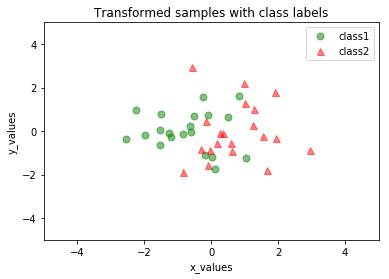

In [260]:
plt.plot(data_2d[0:20, 0], data_2d[0:20, 1],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(data_2d[20:40, 0], data_2d[20:40, 1],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

Results 3D to 1D:

In [261]:
pca = PCA()
data_1d = pca.reduce(data, 1)

In [262]:
print(data_1d)

[[ 1.02488425]
 [ 0.0293071 ]
 [-1.53125849]
 [-1.51891323]
 [-2.2497059 ]
 [ 0.10237407]
 [-2.54827969]
 [-1.9763714 ]
 [-0.08415441]
 [-1.25858998]
 [-0.50933422]
 [-0.8379973 ]
 [-0.62340299]
 [-0.25799226]
 [-0.61264009]
 [ 0.50191498]
 [-0.18533682]
 [-1.50487969]
 [-1.20125442]
 [ 0.81780756]
 [ 0.33915493]
 [ 0.18010734]
 [-0.58465505]
 [ 1.92701464]
 [ 0.98279252]
 [-0.30980787]
 [ 1.65638213]
 [ 1.55369328]
 [ 1.01918686]
 [-0.15123909]
 [ 1.27068043]
 [ 0.61069228]
 [ 0.59181787]
 [ 1.23900405]
 [-0.10250642]
 [ 2.96140356]
 [-0.04774674]
 [ 0.24733162]
 [-0.85040472]
 [ 1.89092132]]
